In [1]:
import pandas as pd


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from subprocess import check_output
%matplotlib inline

In [4]:
df=pd.read_csv('C:\\Users\\Sony\\Desktop\\Google Drive Sync\\DS Project\\ozone-depleting-substance-emissions.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
Entity                                                                                         108 non-null object
Code                                                                                           0 non-null float64
Year                                                                                           108 non-null int64
Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)    108 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [6]:
# so we have a column named Code that has all null values so will drop the code column.
df.head()

,Entity,Code,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
0,Natural emissions,NaN,1961,165000
1,Natural emissions,NaN,1962,165000
2,Natural emissions,NaN,1963,165000
3,Natural emissions,NaN,1964,165000
4,Natural emissions,NaN,1965,165000


In [7]:
df.shape

(108, 4)

In [14]:
print(df.dtypes)

Entity                                                                                          object
Code                                                                                           float64
Year                                                                                             int64
Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)      int64
dtype: object


In [18]:
df.describe()

,Code,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
count,0.0,108.000000,1.080000e+02
mean,NaN,1987.500000,4.654630e+05
std,NaN,15.658446,3.828072e+05
min,NaN,1961.000000,1.650000e+05
25%,NaN,1974.000000,1.650000e+05
50%,NaN,1987.500000,2.425000e+05
75%,NaN,2001.000000,6.700000e+05
max,NaN,2014.000000,1.460000e+06


In [19]:
df.drop('Code', axis=1, inplace=True) # Code column dropped as it contain all Nan values

In [20]:
df.head()

,Entity,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
0,Natural emissions,1961,165000
1,Natural emissions,1962,165000
2,Natural emissions,1963,165000
3,Natural emissions,1964,165000
4,Natural emissions,1965,165000


In [23]:
df.loc[df['Year'] == 1963]
# so we can see that in our dataset for each year, we have Natural emissions and Total emissions data
# Next, we will add the Natural emissions and Total emissions data


,Entity,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
2,Natural emissions,1963,165000
56,Total emissions,1963,440000


In [24]:
df.groupby(['Year' ]).sum()['Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)']

Year
1961     545000
1962     565000
1963     605000
1964     645000
1965     675000
1966     705000
1967     745000
1968     795000
1969     825000
1970     885000
1971     935000
1972    1005000
1973    1075000
1974    1145000
1975    1205000
1976    1215000
1977    1235000
1978    1235000
1979    1275000
1980    1245000
1981    1205000
1982    1265000
1983    1255000
1984    1315000
1985    1345000
1986    1445000
1987    1525000
1988    1625000
1989    1575000
1990    1485000
1991    1355000
1992    1245000
1993    1125000
1994     985000
1995     925000
1996     865000
1997     805000
1998     765000
1999     755000
2000     725000
2001     695000
2002     655000
2003     645000
2004     635000
2005     615000
2006     595000
2007     575000
2008     565000
2009     555000
2010     545000
2011     535000
2012     515000
2013     505000
2014     485000
Name: Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents), dtype: int64

In [25]:
df_ozone=df.groupby(['Year' ]).sum()['Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)']
df_ozone= df_ozone.to_frame()
df_ozone.head()

,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
Year,
1961,545000
1962,565000
1963,605000
1964,645000
1965,675000


In [26]:
# renaming the second column to some managable name

df_ozone = df_ozone.rename(columns={'Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)': 'Ozone-depleting substance emissions (tonnes CFC11-equivalents)'})

In [27]:
df_ozone.head()

,Ozone-depleting substance emissions (tonnes CFC11-equivalents)
Year,
1961,545000
1962,565000
1963,605000
1964,645000
1965,675000


In [31]:
df_ozone.dtypes

Ozone-depleting substance emissions (tonnes CFC11-equivalents)    int64
dtype: object

In [32]:
df_ozone['Year'] = df_ozone.index.tolist()

df_ozone.index = np.arange(0,len(df_ozone))

In [34]:
df_ozone.head()

,Ozone-depleting substance emissions (tonnes CFC11-equivalents),Year
0,545000,1961
1,565000,1962
2,605000,1963
3,645000,1964
4,675000,1965


In [47]:
plt.figure(figsize=(15,80))

<Figure size 1080x5760 with 0 Axes>

<Figure size 1080x5760 with 0 Axes>

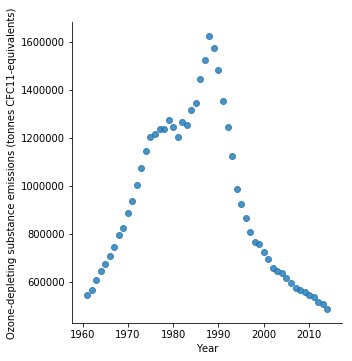

In [48]:
sns.lmplot('Year', 'Ozone-depleting substance emissions (tonnes CFC11-equivalents)', data=df_ozone, fit_reg=False)

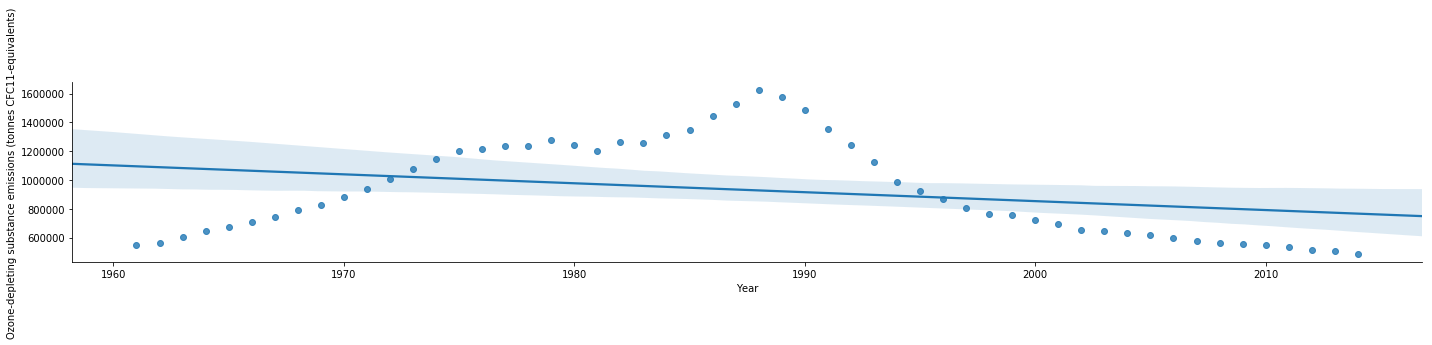

In [49]:
sns.lmplot(data=df_ozone, x='Year', y='Ozone-depleting substance emissions (tonnes CFC11-equivalents)', size=4, aspect=5)

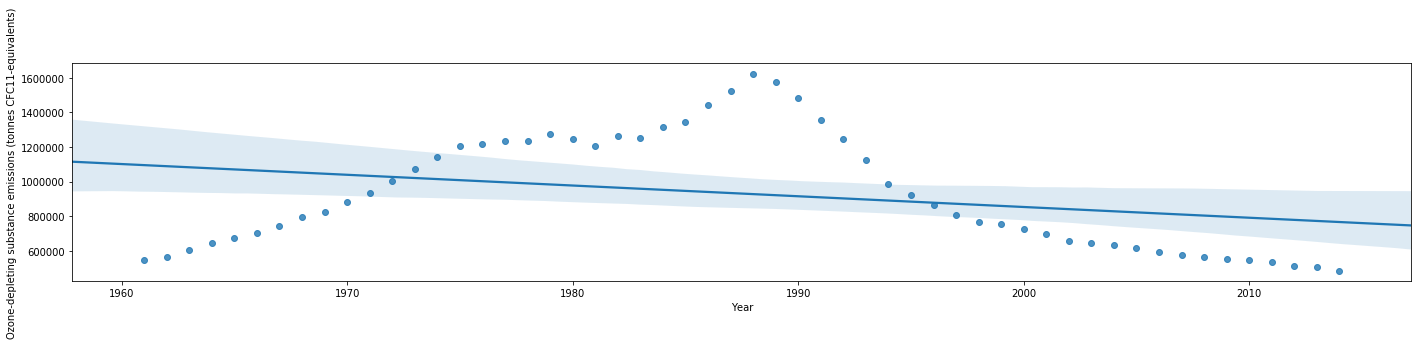

In [50]:
plt.figure(figsize=(24,4))
sns.regplot(data=df_ozone, x='Year', y='Ozone-depleting substance emissions (tonnes CFC11-equivalents)')